In [1]:
import keras

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
print(len(y_train), len(y_test))

from collections import namedtuple
import influence.dataset

Datasets = namedtuple('Datasets',['train', 'test'])
data_sets = Datasets(train=influence.dataset.DataSet(x=X_train, labels=y_train.astype("int32")),
                    test=influence.dataset.DataSet(x=X_test, labels=y_test.astype("int32")))

(60000, 10000)


Using TensorFlow backend.


In [2]:
import influence.genericNeuralNet
reload(influence.genericNeuralNet)
import influence.keras_tensorflow_model
reload(influence.keras_tensorflow_model)
import numpy as np
from keras import backend as K

K.clear_session() #have to clear the session each time a new influence model is loaded
mnist_model = keras.models.load_model("mnist.h5")
influence_model = influence.keras_tensorflow_model.KerasSequentialCategoricalCrossentropyLoss(keras_model=mnist_model,
                                                   batch_size=50, data_sets=data_sets,
                                                   temperature=5000, #so the softmax does not saturate
                                                   model_name='mnist_model')
#sanity check predictions
predictions = influence_model.sess.run(
    influence_model.preds,
    feed_dict=influence_model.all_test_feed_dict)
print("Prediction accuracy",np.sum(np.argmax(predictions, axis=1) == y_test)/float(len(y_test)))

Total number of parameters: 669706
('Prediction accuracy', 0.98)


Exception RuntimeError: RuntimeError('Failed to retrieve old handler',) in 'h5py._errors.set_error_handler' ignored
Exception RuntimeError: RuntimeError('Failed to retrieve old handler',) in 'h5py._errors.set_error_handler' ignored


Test set example


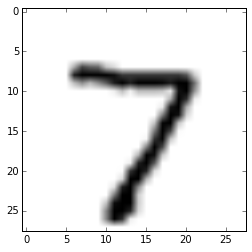

Norm of test gradient: 2.0276394
Function value: -4.111321449279785
Split function value: 0.0, -4.1113214
Optimization terminated successfully.
         Current function value: -4.111321
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Saved inverse HVP to output/mnist_model-cg-normal_loss-test-[0].npz
Inverse HVP took 9.59125804901 sec
Processing examples
Did 0 examples
Multiplying by 1000 train examples took 2.66756296158 sec
Top positive influence:
('Idx', 773, 'Influences', 5.820433298746745e-05)


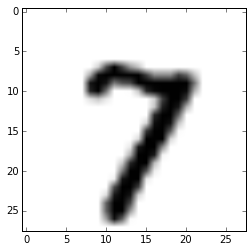

Top negative influence:
('Idx', 659, 'Influences', -4.745749632517497e-06)


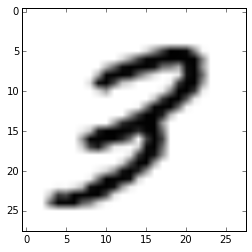

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

test_idx = 0
train_indices_to_check = np.arange(1000)

print("Test set example")
plt.imshow(X_test[0], cmap="binary")
plt.show()

influences = influence_model.get_influence_on_test_loss(
    test_indices=[test_idx],
    train_idx=train_indices_to_check)

sorted_influences = sorted(enumerate(influences), key=lambda x: x[1])
print("Top positive influence:")
for idx, inf in sorted_influences[-1:]:
    print("Idx",idx,"Influences",inf)
    plt.imshow(X_train[idx], cmap="binary")
    plt.show()
print("Top negative influence:")
for idx, inf in sorted_influences[:1]:
    print("Idx",idx,"Influences",inf)
    plt.imshow(X_train[idx], cmap="binary")
    plt.show()

In [4]:
#verify that the method I wrote for computing influence of a single train index
#on multiple test indices is working by comparing it to the results from the
#method for getting the influence on a single test index for multiple train indices
influence_10_on_0_and_1 = influence_model.get_influence_on_multiple_test_losses_for_train_indices(
                                  test_indices=[0,1],
                                  train_indices=[10])
influence_11_on_0_and_1 = influence_model.get_influence_on_multiple_test_losses_for_train_indices(
                                    test_indices=[0,1],
                                    train_indices=[11])
influence_10_and_11_on_0 = influence_model.get_influence_on_test_loss(
                                    test_indices=[0],
                                    train_idx=[10,11])
influence_10_and_11_on_1 = influence_model.get_influence_on_test_loss(
                                    test_indices=[1],
                                    train_idx=[10,11])
print("Influence of train index 10 on test indices 0 and 1: ", influence_10_on_0_and_1)
print("Influence of train index 11 on test indices 0 and 1: ", influence_11_on_0_and_1)
print("Influence of train index 10 and 11 on test index 0: ", influence_10_and_11_on_0)
print("Influence of train index 10 and 11 on test index 1: ", influence_10_and_11_on_1)

Norm of train gradient: 2.412409
Function value: -5.819717884063721
Split function value: 0.0, -5.819718
Optimization terminated successfully.
         Current function value: -5.819718
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Saved inverse HVP to output/mnist_model-cg-normal_loss-train-[10].npz
Inverse HVP took 9.60494494438 sec
Processing examples
Did 0 examples
Multiplying by 2 train examples took 0.0221660137177 sec
Norm of train gradient: 2.4243453
Function value: -5.877449989318848
Split function value: 0.0, -5.87745
Optimization terminated successfully.
         Current function value: -5.877450
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 1
Saved inverse HVP to output/mnist_model-cg-normal_loss-train-[11].npz
Inverse HVP took 9.60746002197 sec
Processing examples
Did 0 examples
Multiplying by 2 train examples took 0.0069210529